# Exploratory Data Analysis

_EDA is an approach to data analysis that uses a variety of techniques, largely visual, to:Maximize insight,reveal underlying structure,check for outliers,test assumptions,and determine optimal factors. It is an approach to analysis of your data that delays the usual assumptions and instead allow the data to speak for itself._

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
data.shape

(1460, 81)

<AxesSubplot:>

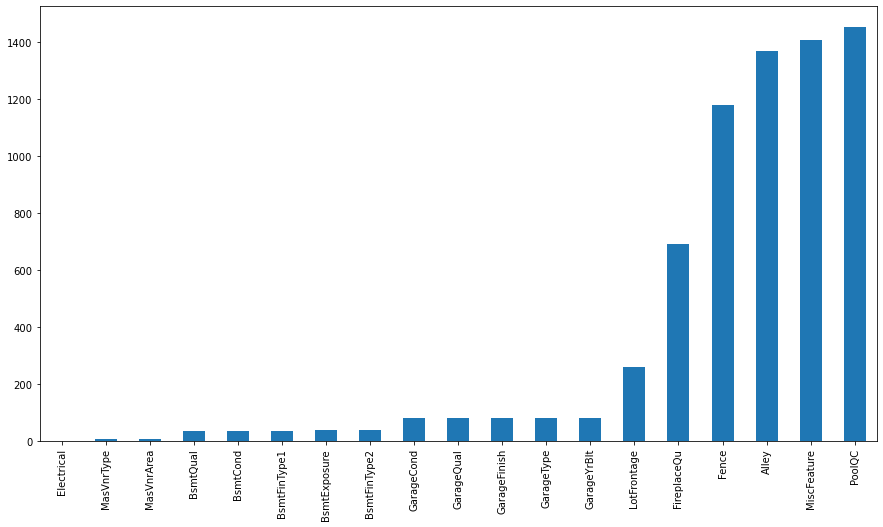

In [7]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
plt.figure(figsize=(15,8))
missing.plot.bar()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


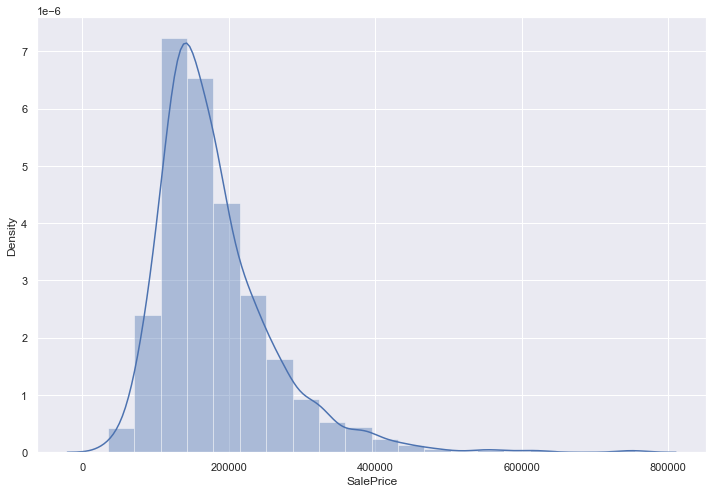

In [8]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(data['SalePrice'],bins = 20);

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

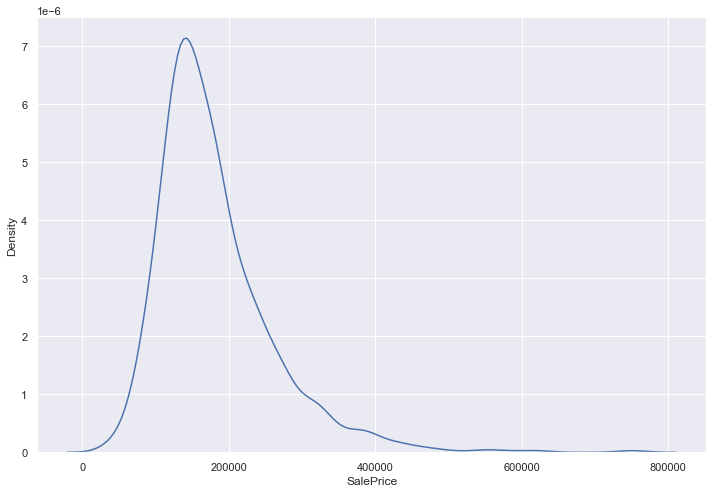

In [9]:
sns.kdeplot(data['SalePrice'])

In [10]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Correlation

In [11]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
categorical_features = data.select_dtypes(include=[np.object])
categorical_features.columns

<ipython-input-12-883cb3292006>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = data.select_dtypes(include=[np.object])


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
correlation = numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending = False),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

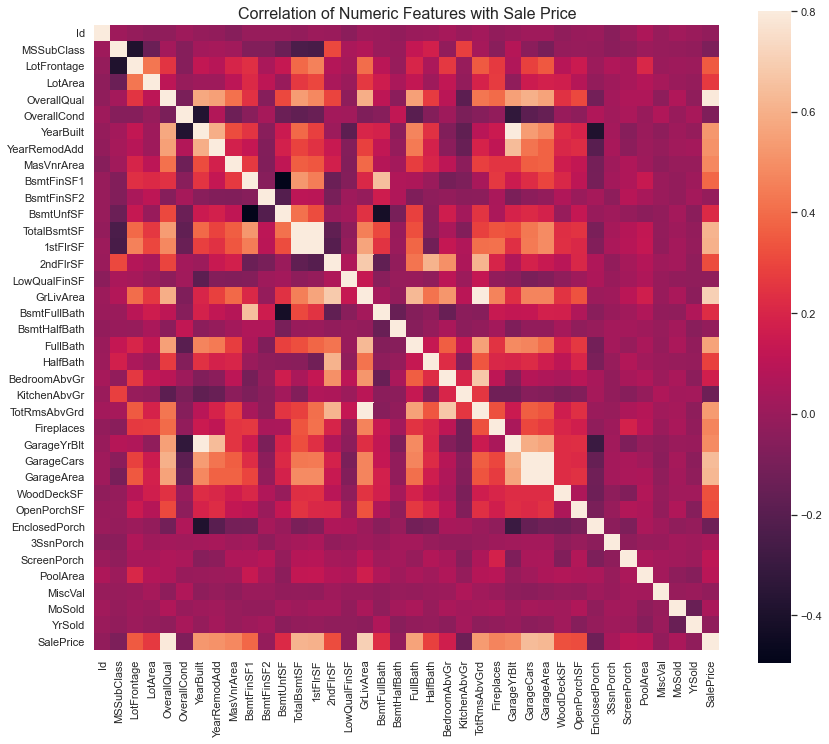

In [14]:
f, ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Sale Price',y = 1,size = 16)

sns.heatmap(correlation,square = True, vmax=0.8)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


<AxesSubplot:>

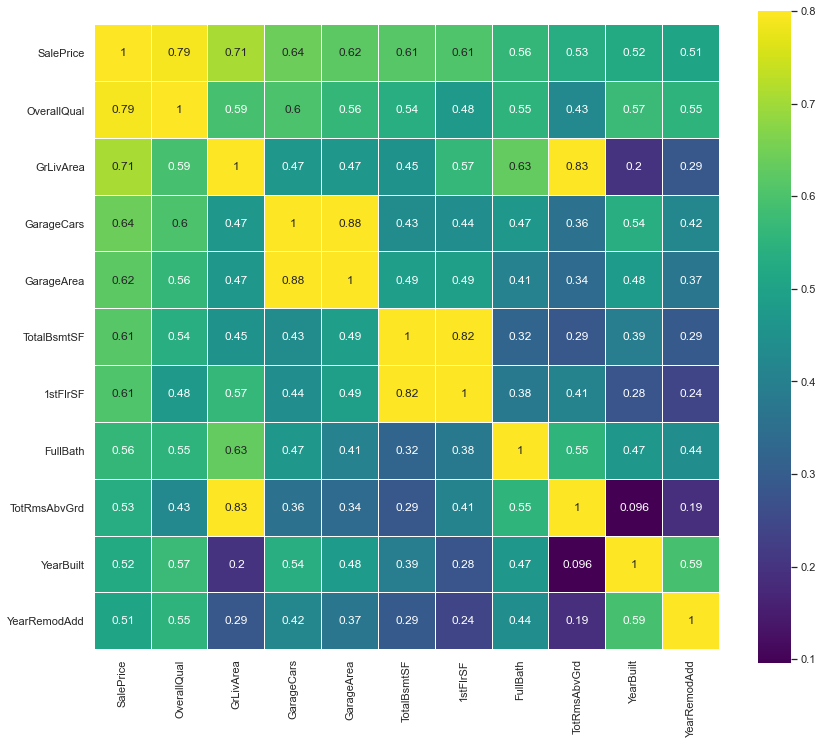

In [15]:
k = 11
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax =.8, linewidths = 0.01,square = True,annot=True,cmap='viridis',
           linecolor="white",xticklabels = cols.values , annot_kws = {'size':12},yticklabels = cols.values)

# Scatterplot

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

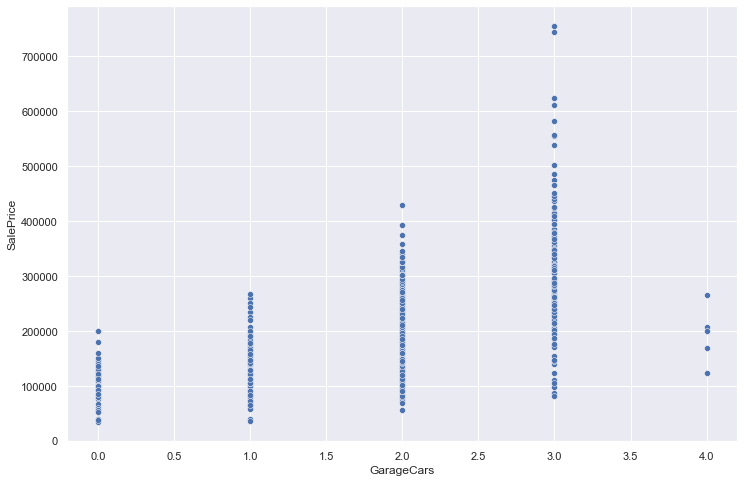

In [19]:
sns.scatterplot(x = 'GarageCars', y = 'SalePrice', data = data )

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

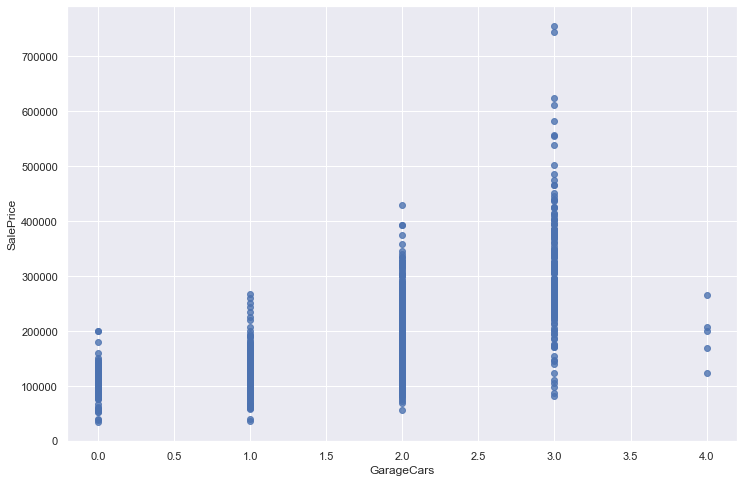

In [20]:
sns.regplot(x = 'GarageCars', y = 'SalePrice', data = data ,scatter = True, fit_reg = False)

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

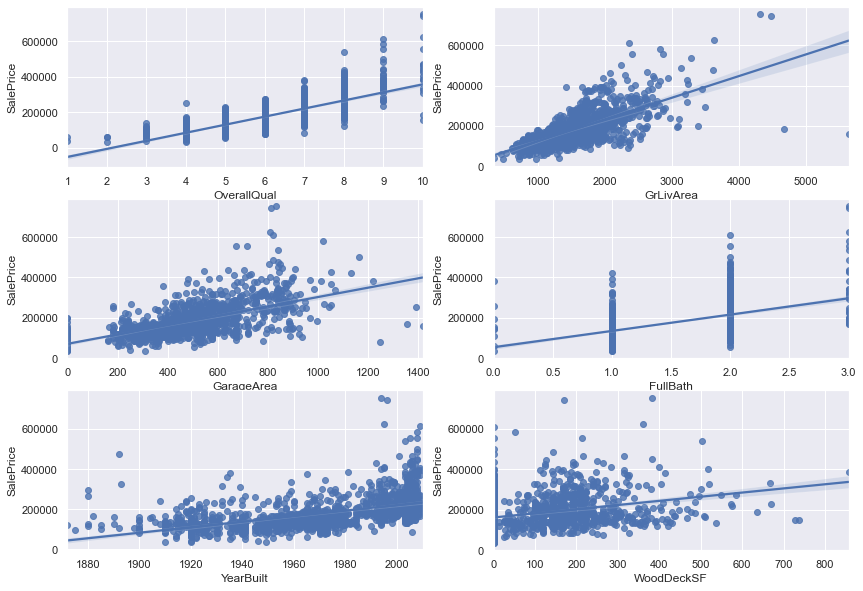

In [22]:
# Scatter plots between the most correlated variables.
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2, figsize =(14,10))

sns.regplot(x = 'OverallQual', y = 'SalePrice', data = data,scatter = True, fit_reg = True, ax = ax1)

sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = data,scatter = True, fit_reg = True, ax = ax2)

sns.regplot(x = 'GarageArea', y = 'SalePrice', data = data,scatter = True, fit_reg = True, ax = ax3)

sns.regplot(x = 'FullBath', y = 'SalePrice', data = data,scatter = True, fit_reg = True, ax = ax4)

sns.regplot(x = 'YearBuilt', y = 'SalePrice', data = data,scatter = True, fit_reg = True, ax = ax5)

sns.regplot(x = 'WoodDeckSF', y = 'SalePrice', data = data,scatter = True, fit_reg = True, ax = ax6)

<AxesSubplot:xlabel='SalePrice'>

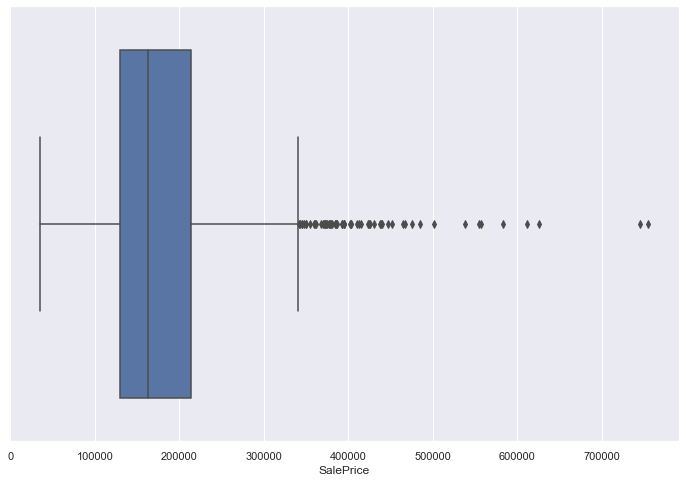

In [23]:
sns.boxplot(x = data["SalePrice"])

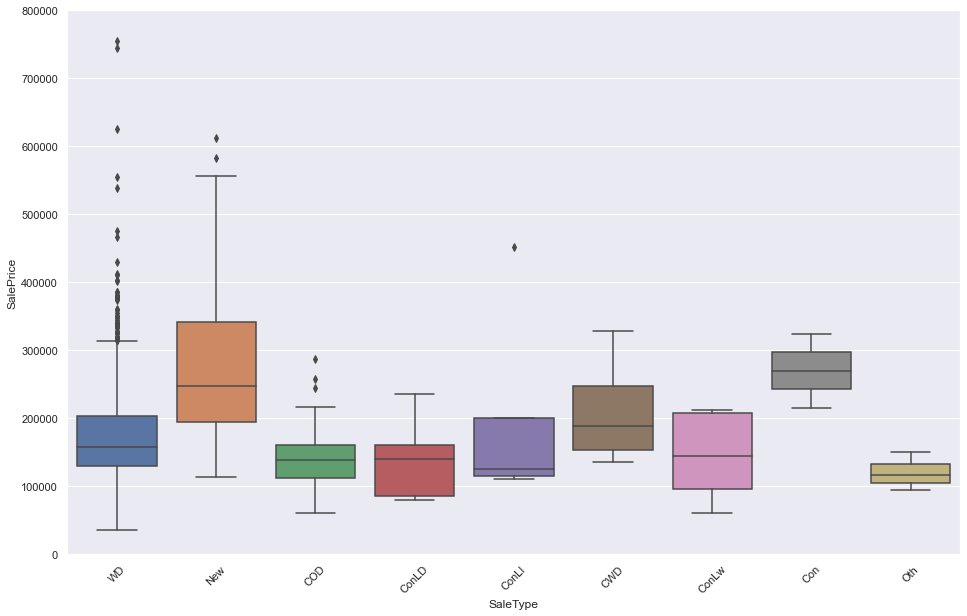

In [25]:
f, ax = plt.subplots(figsize = (16, 10))
fig = sns.boxplot(x = 'SaleType', y = "SalePrice", data = data)
fig.axis(ymin = 0, ymax = 800000)
xt = plt.xticks(rotation = 45)

# Remove Outliers

In [26]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice'>

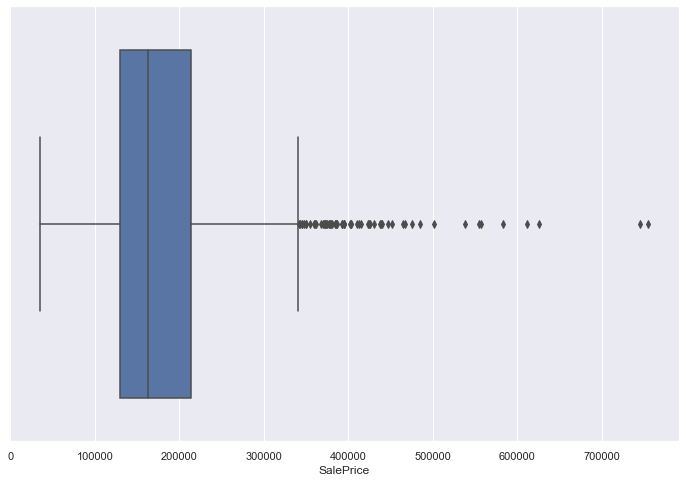

In [27]:
sns.boxplot(x=data["SalePrice"])

In [28]:
data.shape

(1460, 81)

In [30]:
first_quartile = data['SalePrice'].quantile(.25)
third_quartile = data['SalePrice'].quantile(.75)
IQR = third_quartile - first_quartile

In [31]:
new_boundary = third_quartile + 3*IQR

In [32]:
data.drop(data[data['SalePrice']>new_boundary].index,axis = 0,inplace = True)

In [33]:
data.shape

(1448, 81)